# Setup

In [26]:
!pip install matplotlib --quiet
!pip install pandas --quiet
!pip install requests --quiet
!pip install numpy --quiet

In [27]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import numpy as np

In [28]:
file_id = "1IgeISSLK7K8lJKULUQudSoI9_tiBM7Vb"
url = f"https://drive.google.com/uc?id={file_id}"

Add whatever firewalls necessary if prompted.

In [29]:
# Download the contents of the CSV file
download = requests.get(url).content

# Read the CSV file into a Pandas DataFrame
wine_data = pd.read_csv(io.StringIO(download.decode("utf-8")))
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Confirm clean data:

In [30]:
wine_data.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

# Plot variables against quality:

In [31]:
def qualityVs(var):
    wine_data.plot(x=var, y='quality', kind='scatter')
    plt.show()

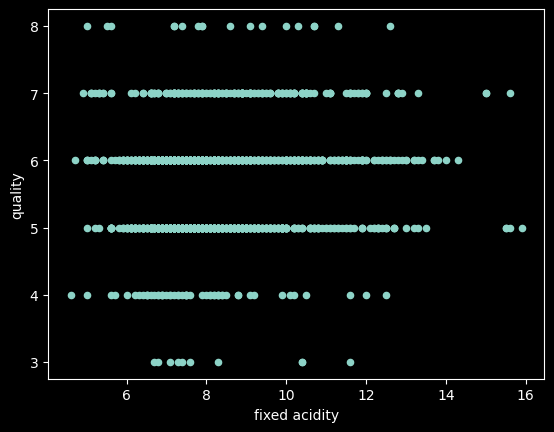

In [32]:
qualityVs('fixed acidity')

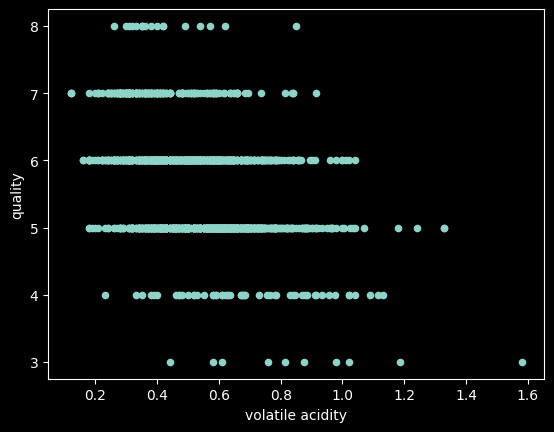

In [33]:
qualityVs('volatile acidity')

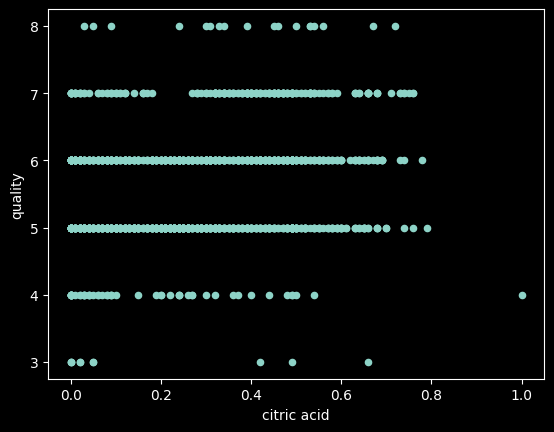

In [34]:
qualityVs('citric acid')

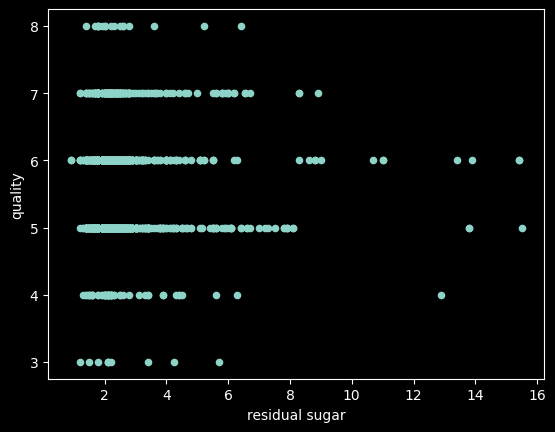

In [35]:
qualityVs('residual sugar')

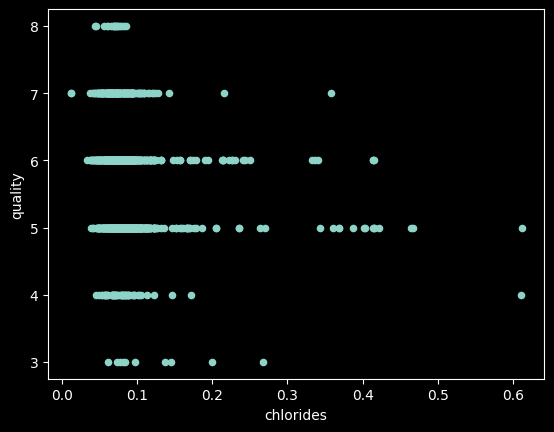

In [36]:
qualityVs('chlorides')

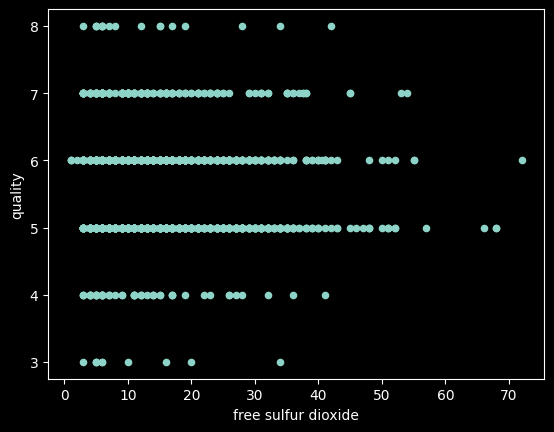

In [37]:
qualityVs('free sulfur dioxide')

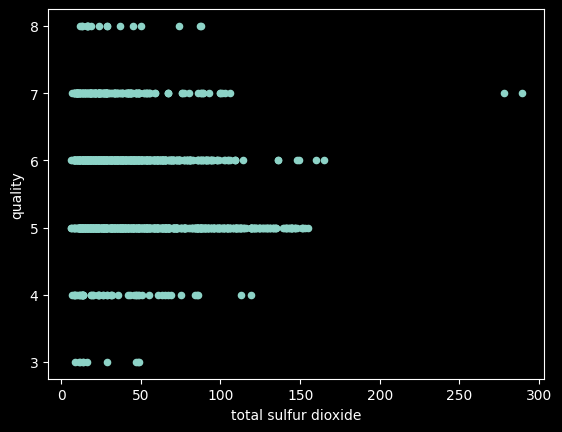

In [38]:
qualityVs('total sulfur dioxide')

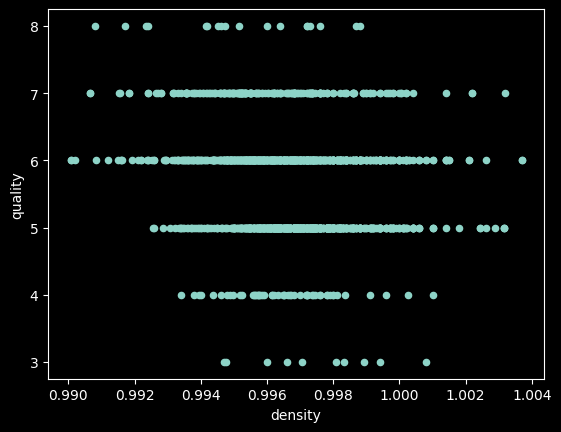

In [39]:
qualityVs('density')

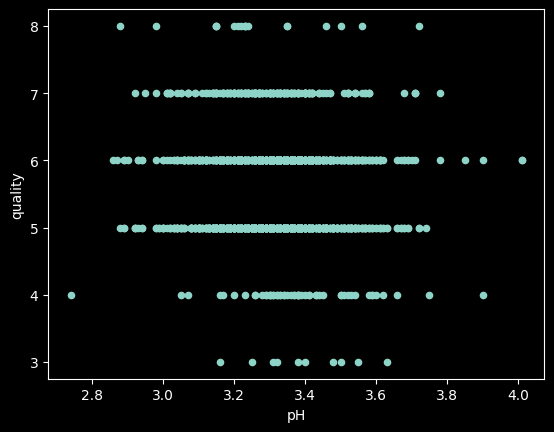

In [40]:
qualityVs('pH')

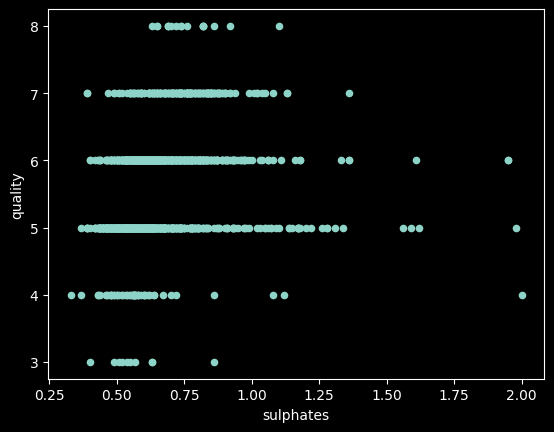

In [41]:
qualityVs('sulphates')

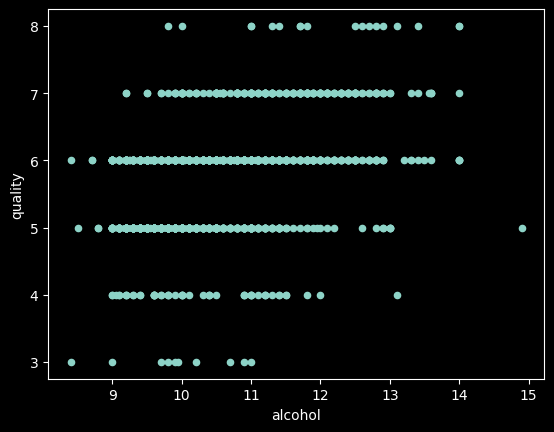

In [42]:
qualityVs('alcohol')

# Characteristics of top-rated wines

In [43]:
eights = wine_data[wine_data['quality'] == 8]

In [44]:
def distributionEights(var):
    num_bins = 10
    min = wine_data[var].min()
    max = wine_data[var].max()
    bin_edges = [min + i * (max - min) / num_bins for i in range(num_bins + 1)]
    thisPlot = eights[var].plot(kind='hist', edgecolor='black', bins=bin_edges)
    thisPlot.set_xlim(min, max)
    plt.xlabel(var)
    plt.ylabel('Frequency (among top-rated wines)')
    plt.show()
    print("Median =", eights[var].median())

In [45]:
def distributionAll(var):
    num_bins = 10
    min = wine_data[var].min()
    max = wine_data[var].max()
    bin_edges = [min + i * (max - min) / num_bins for i in range(num_bins + 1)]
    thisPlot = wine_data[var].plot(kind='hist', edgecolor='black', bins=bin_edges)
    thisPlot.set_xlim(min, max)
    plt.xlabel(var)
    plt.ylabel('Frequency (all data)')
    plt.show()
    print("Median =", wine_data[var].median())

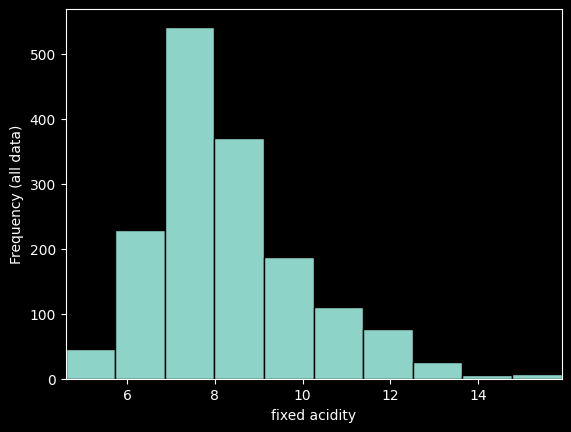

Median = 7.9


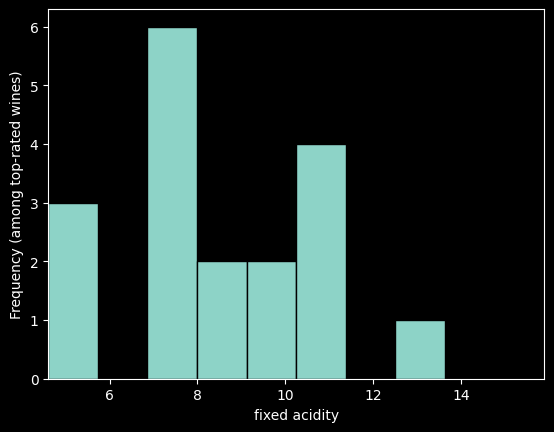

Median = 8.25


In [46]:
distributionAll('fixed acidity')
distributionEights('fixed acidity')

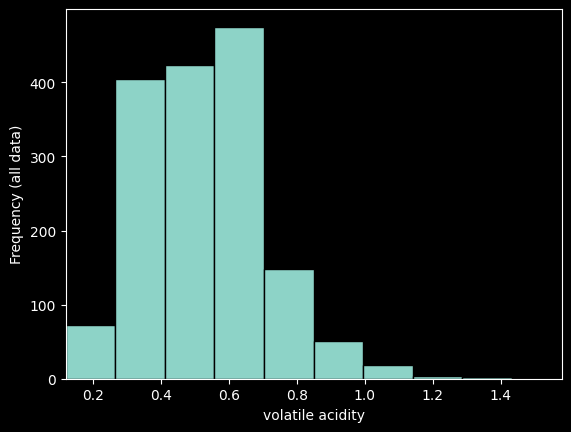

Median = 0.52


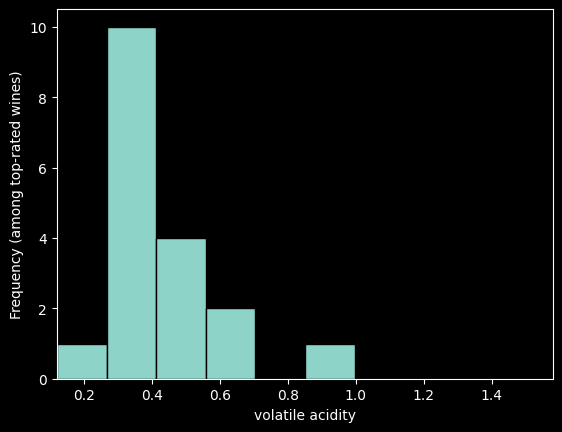

Median = 0.37


In [47]:
distributionAll('volatile acidity')
distributionEights('volatile acidity')

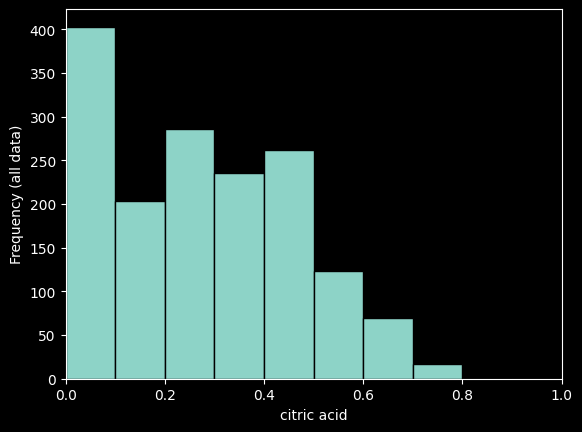

Median = 0.26


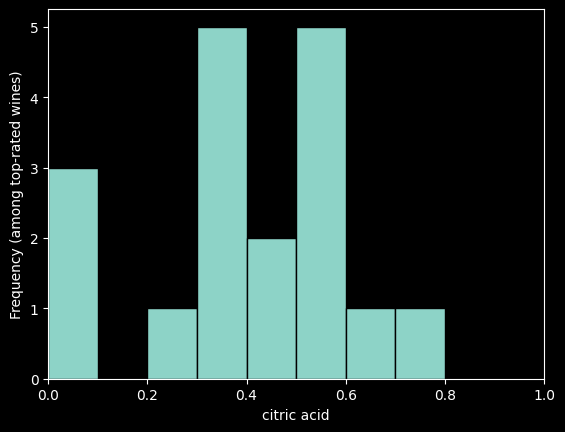

Median = 0.42000000000000004


In [48]:
distributionAll('citric acid')
distributionEights('citric acid')

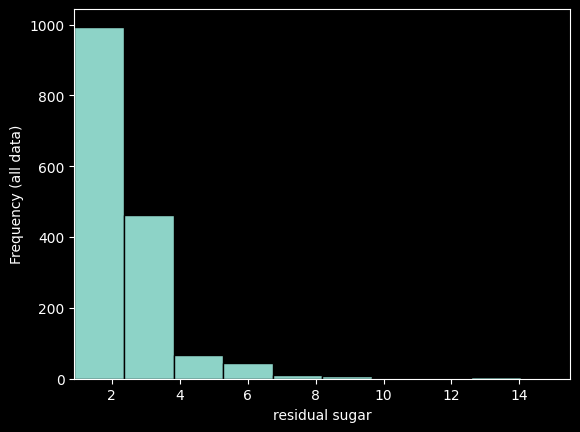

Median = 2.2


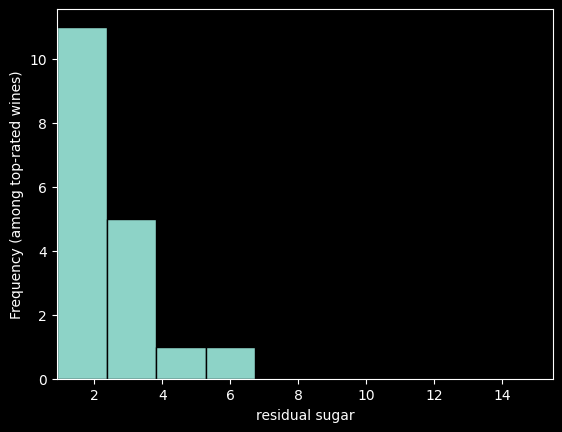

Median = 2.1


In [49]:
distributionAll('residual sugar')
distributionEights('residual sugar')

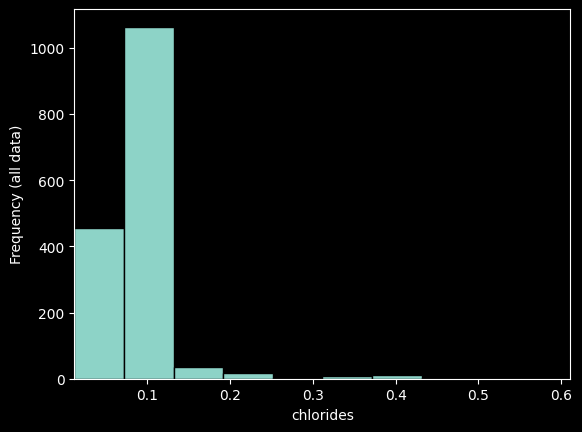

Median = 0.079


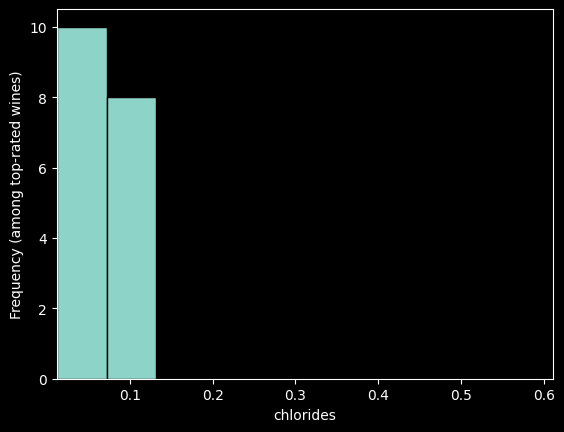

Median = 0.07050000000000001


In [50]:
distributionAll('chlorides')
distributionEights('chlorides')

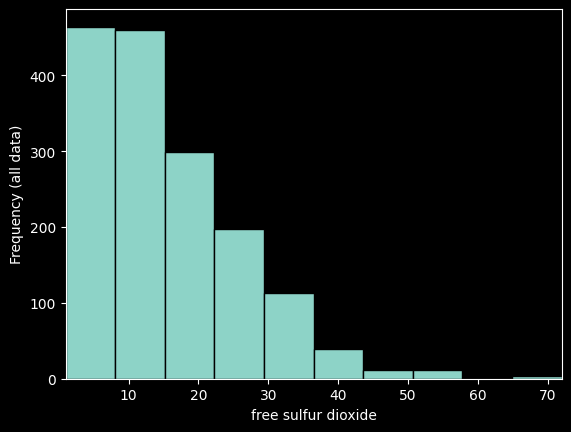

Median = 14.0


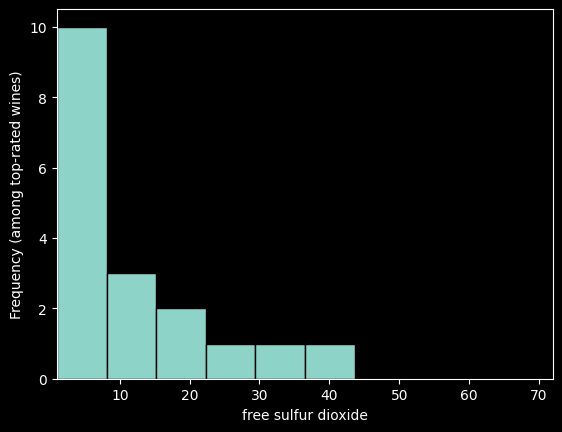

Median = 7.5


In [51]:
distributionAll('free sulfur dioxide')
distributionEights('free sulfur dioxide')

# Analysis

It is extremely obvious from the scatterplots that there is no singular variable among those given that show a positive or negative correlation with the wine's quality rating. However, the highest rated wines have certain variables concentrated around certain values. By plotting the distributions of each variable among the wines with the highest ratings in the data set, that is, wines with rating 8, and comparing the distributions with those of each variable among all the data, we can observe some characteristics that are common among higher-quality wines. Volatile acidity tends to skew a little lower, citric acid is a little higher, chlorides skews a little lower, and free sulfur dioxide skews significantly lower. 